In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import re 
from operator import itemgetter
import warnings
from scipy.integrate import solve_ivp
from scipy import optimize
import seaborn as sns
import PyCCELL_PRFQT as px

C:\Users\nessl\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def endpoint(df):
    end_point = pd.DataFrame(df.max(axis=0))
    end_point = end_point.T
    end_point= end_point.drop(columns=[i for i in end_point.columns if 'Time'in i or'NC'in i or'std' in i])
    return end_point

In [3]:
test = px.main('../results/SHERLOCK/1st_try_probe_dilution/sherlock_probe_concentr_3_v2.xlsx',
               75,"YES",3,4,'col',['J6','K6','L6'],"YES")

IndexError: list index out of range

In [41]:
test.rename(columns={"['J3', 'K3', 'L3']": '2µM_P',
                   "['J4', 'K4', 'L4']": '1µM_P',
                     "['J5', 'K5', 'L5']":'0.1µM_P' ,
                     "['J6', 'K6', 'L6']": 'NC',
                     0: '2µM_P_std',
                   1: '1µM_P_std',
                     2:'0.1µM_P_std' ,
                     3:'NC_std'
                     },
          inplace=True, errors='raise')

test.head()

,2µM_P,1µM_P,0.1µM_P,NC,Time,2µM_P_std,1µM_P_std,0.1µM_P_std,NC_std
0,0.015962,0.000000,0.002983,0.0,0,0.002233,0.007983,0.003680,0.003167
1,0.017959,0.001063,0.004483,0.0,5,0.001228,0.009868,0.003855,0.000862
2,0.042864,0.012309,0.006079,0.0,10,0.009536,0.013337,0.002635,0.001825
3,0.083645,0.026314,0.007757,0.0,15,0.014689,0.016499,0.006394,0.001087
4,0.122778,0.043079,0.010644,0.0,20,0.015169,0.016702,0.001205,0.001231


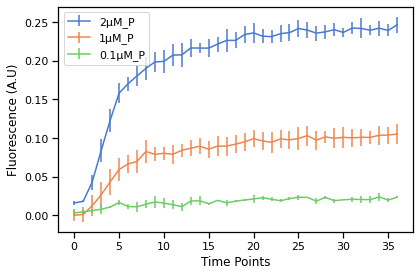

In [42]:
sns.set_context("notebook")
test[['2µM_P','1µM_P','0.1µM_P']].plot(yerr=[test['2µM_P_std'],
                                                          test['1µM_P_std'],
                                                          test['0.1µM_P_std']])
plt.legend()
plt.ylabel("Fluorescence (A.U)")
plt.xlabel("Time Points")
plt.tight_layout()
#plt.savefig("../images/SHERLOCK/probe_dilution_pt3.png",dpi=300)
plt.show()

fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)

sns.set_context("notebook")
test[['0.1µM_P']].plot(yerr=[test['0.1µM_P_std']],ax=ax[0])
test_2[['1µM_P']].plot(yerr=[test_2['1µM_P_std']],ax=ax[1])

for ax in ax:
    
    ax.legend()
    ax.set_ylabel("Fluorescence (A.U)")
    ax.set_xlabel("Time Points")
    
#plt.tight_layout()
#plt.savefig("images/SHERLOCK/probe_dilution_pt2.png",dpi=300)
plt.show()

## Endpoint plots

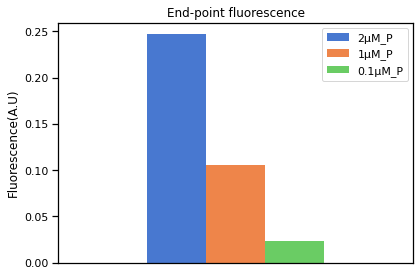

In [43]:
end_point = endpoint(test)
sns.set_context("notebook")
sns.set_palette("muted")

end_point.plot(kind="bar")
plt.legend()
plt.xticks([])
plt.ylabel("Fluorescence(A.U)")
plt.title("End-point fluorescence")
plt.tight_layout()
#plt.savefig("../images/SHERLOCK/end_point_probes_V3.png",dpi=300)
plt.show()